In [1]:
from dziban.mkiv import Chart
from vega_datasets import data
from vega import VegaLite

In [2]:
cars = data('cars')
gapminder = data('gapminder')
flights = data('flights-10k')
movies = data('movies')
population = data('population')

## Cars (N x Q + Q = preserve raw)

In [3]:
cars.head(1)

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01

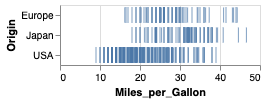

In [4]:
cars1 = Chart(cars).field('Origin', 'Miles_per_Gallon')
cars1

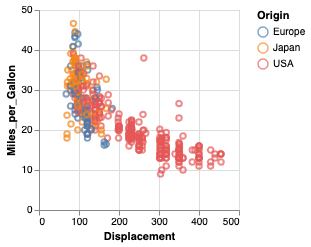

In [5]:
cars1.field('Displacement')

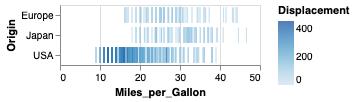

In [6]:
cars1.field('Displacement').anchor_on(cars1)

## Cars (Q x Q + bin = preserve channel assignments)

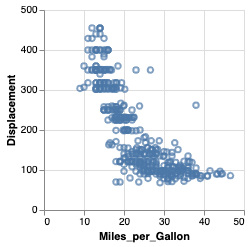

In [7]:
cars2 = Chart(cars).field('Miles_per_Gallon', 'Displacement')
cars2

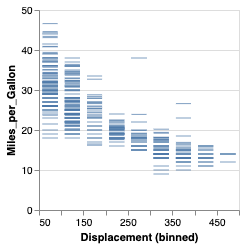

In [8]:
cars2.field('Displacement', bin=True)

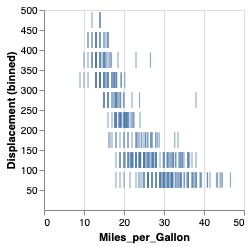

In [9]:
cars2.field('Displacement', bin=True).anchor_on(cars2)

## Cars (Q x Q + aggregate = scale)

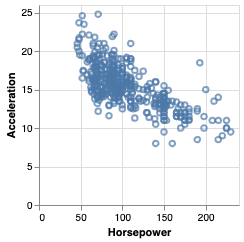

In [10]:
cars3 = Chart(cars).field('Horsepower', 'Acceleration')
cars3

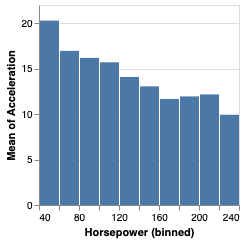

In [11]:
cars3.field('Acceleration', aggregate='mean')

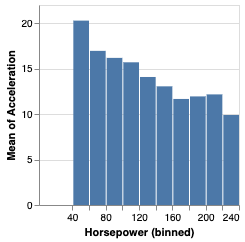

In [12]:
cars3.field('Acceleration', aggregate='mean').anchor_on(cars3)

## Cars (Q x Q + Q = preserve channel assignments)

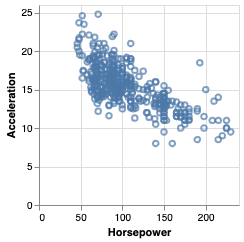

In [13]:
cars4 = Chart(cars).field('Horsepower', 'Acceleration')
cars4

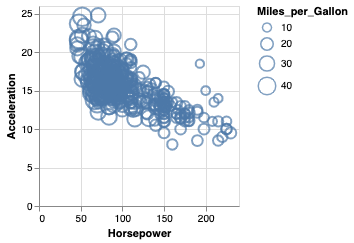

In [14]:
cars4.field('Miles_per_Gallon')

In [15]:
cars4.field('Miles_per_Gallon').anchor_on(cars4)._get_graphscape_rank()

{'rank': 0, 'of': 40}

## Cars (Q x N + bin(Q) = preserve scale)

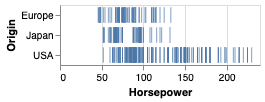

In [16]:
cars5 = Chart(cars).field('Origin', 'Horsepower')
cars5

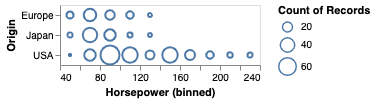

In [17]:
cars5.field('Horsepower', bin=True)

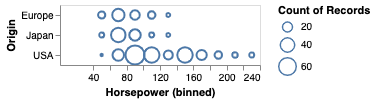

In [18]:
cars5.field('Horsepower', bin=True).anchor_on(cars5)

## Cars (Q x N + aggregate(Q) = preserve mark)

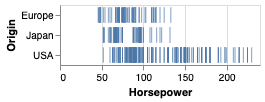

In [19]:
cars6 = Chart(cars).field('Origin', 'Horsepower')
cars6

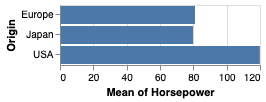

In [20]:
cars6.field('Horsepower', aggregate='mean')

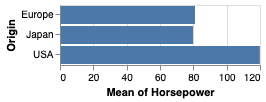

In [21]:
cars6.field('Horsepower', aggregate='mean').anchor_on(cars5)

## Gapminder (N x Q * mark = preserve raw)

In [22]:
gapminder.head(1)

cluster      country  fertility  life_expect      pop  year
0        0  Afghanistan        7.7       30.332  8891209  1955

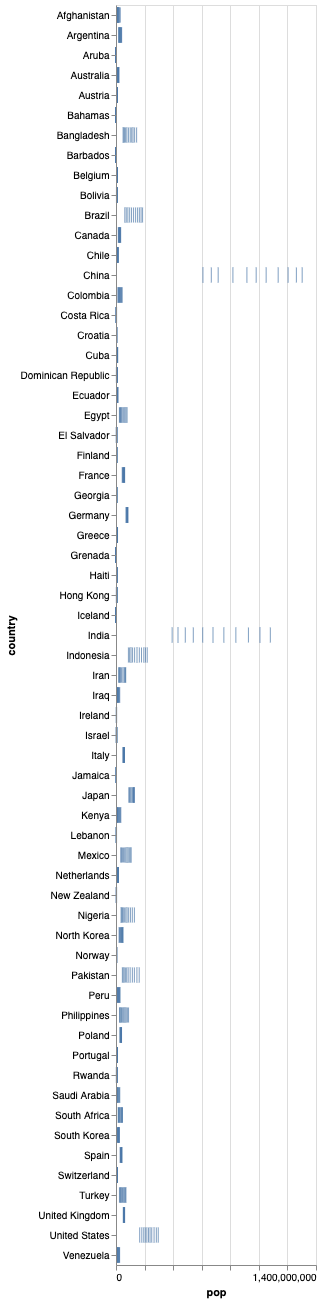

In [23]:
gapminder1 = Chart(gapminder).field('country', 'pop')
gapminder1

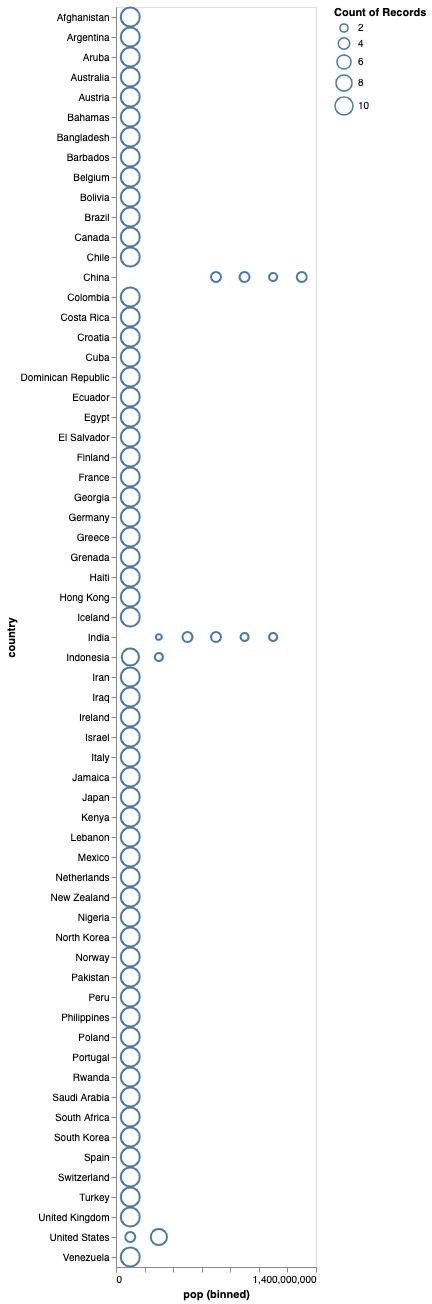

In [24]:
gapminder1.mark('point')

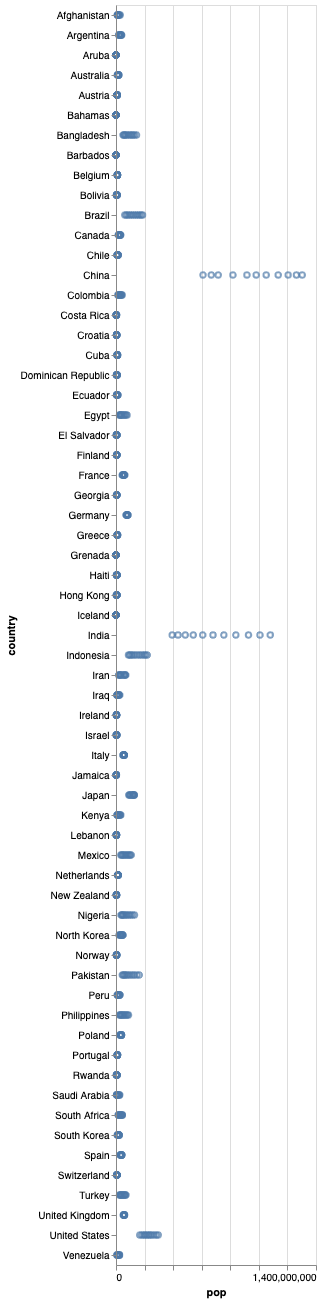

In [25]:
gapminder1.mark('point').anchor_on(gapminder1)

## Flights (Q x Q + N = preserve channel assignments + raw)

In [26]:
flights.head(1)

date  delay destination  distance origin
0 2001-02-14 15:12:00      8         SNA       342    SJC

In [27]:
flights = flights[flights['destination'].isin(['SEA', 'PDX', 'SFO'])]

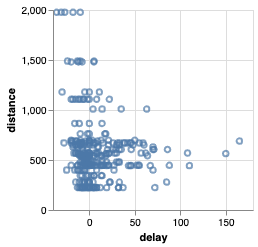

In [28]:
flights1 = Chart(flights).field('distance', 'delay')
flights1

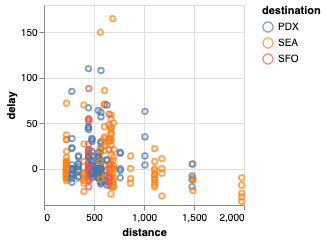

In [29]:
flights1.field('destination')

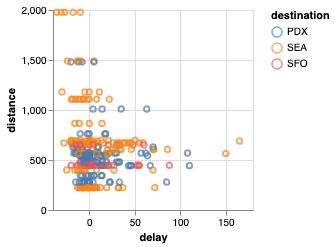

In [30]:
flights1.field('destination').anchor_on(flights1)

## Movies (N + N = preserve mark + channel assignments)

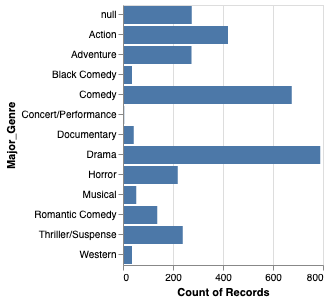

In [31]:
movies1 = Chart(movies).field('Major_Genre')
movies1

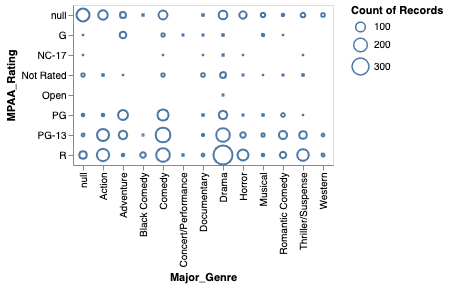

In [32]:
movies1.field('MPAA_Rating')

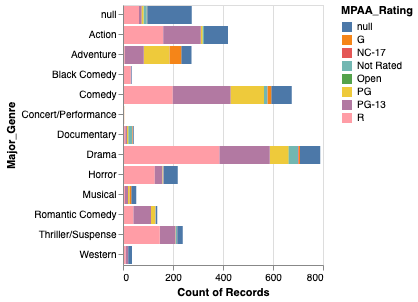

In [33]:
movies1.field('MPAA_Rating').anchor_on(movies1)

## Movies (N x Q + Q preserve mark + channel assignments)

In [34]:
movies2 = Chart(movies).field('Major_Genre', '')